<a class="anchor" id="0"></a>
# **Introduction to RNN with Keras**


Hello friends.


RNN stands for **Recurrent Neural Networks.**


In this notebook, We will discuss **Recurrent Neural Networks**, a class of neural networks that discover the sequential nature of the input data. Inputs could be of text, speech, time series and anything else where sequence matters. We will discuss SimpleRNN cell, its major limitation, RNN topologies, variants of the SimpleRNN cell - **Long Short Term Memory (LSTM)**, **Gated Recurrent Unit (GRU)** and other RNN variants.

We will also see basic RNN implementation in Keras in generating text.

<a class="anchor" id="0.1"></a>
# **Table of Contents**

0. [Back Stroy](#0)
1. [Introduction to Recurrent Neural Network (RNN)](#1)
1. [RNN Computations](#2)
1. [SimpleRNN cells](#3)
1. [Implementation of SimpleRNN with Keras - text generation](#4)
1. [RNN topologies](#5)
1. [Vanishing and exploding gradients](#6)
1. [Long Short Term Memory (LSTM)](#7)
1. [Gated Recurrent Unit (GRU)](#8)
1. [Summary and conclusion](#9)
1. [References](#10)

# **0. Back Stroy** <a class="anchor" id="0"></a>


[Back to Table of Contents](#0.1)

## **Why RNN's?**
* Before dwelling into RNN's, let's understand how the traditional neural networks(ANN) work.

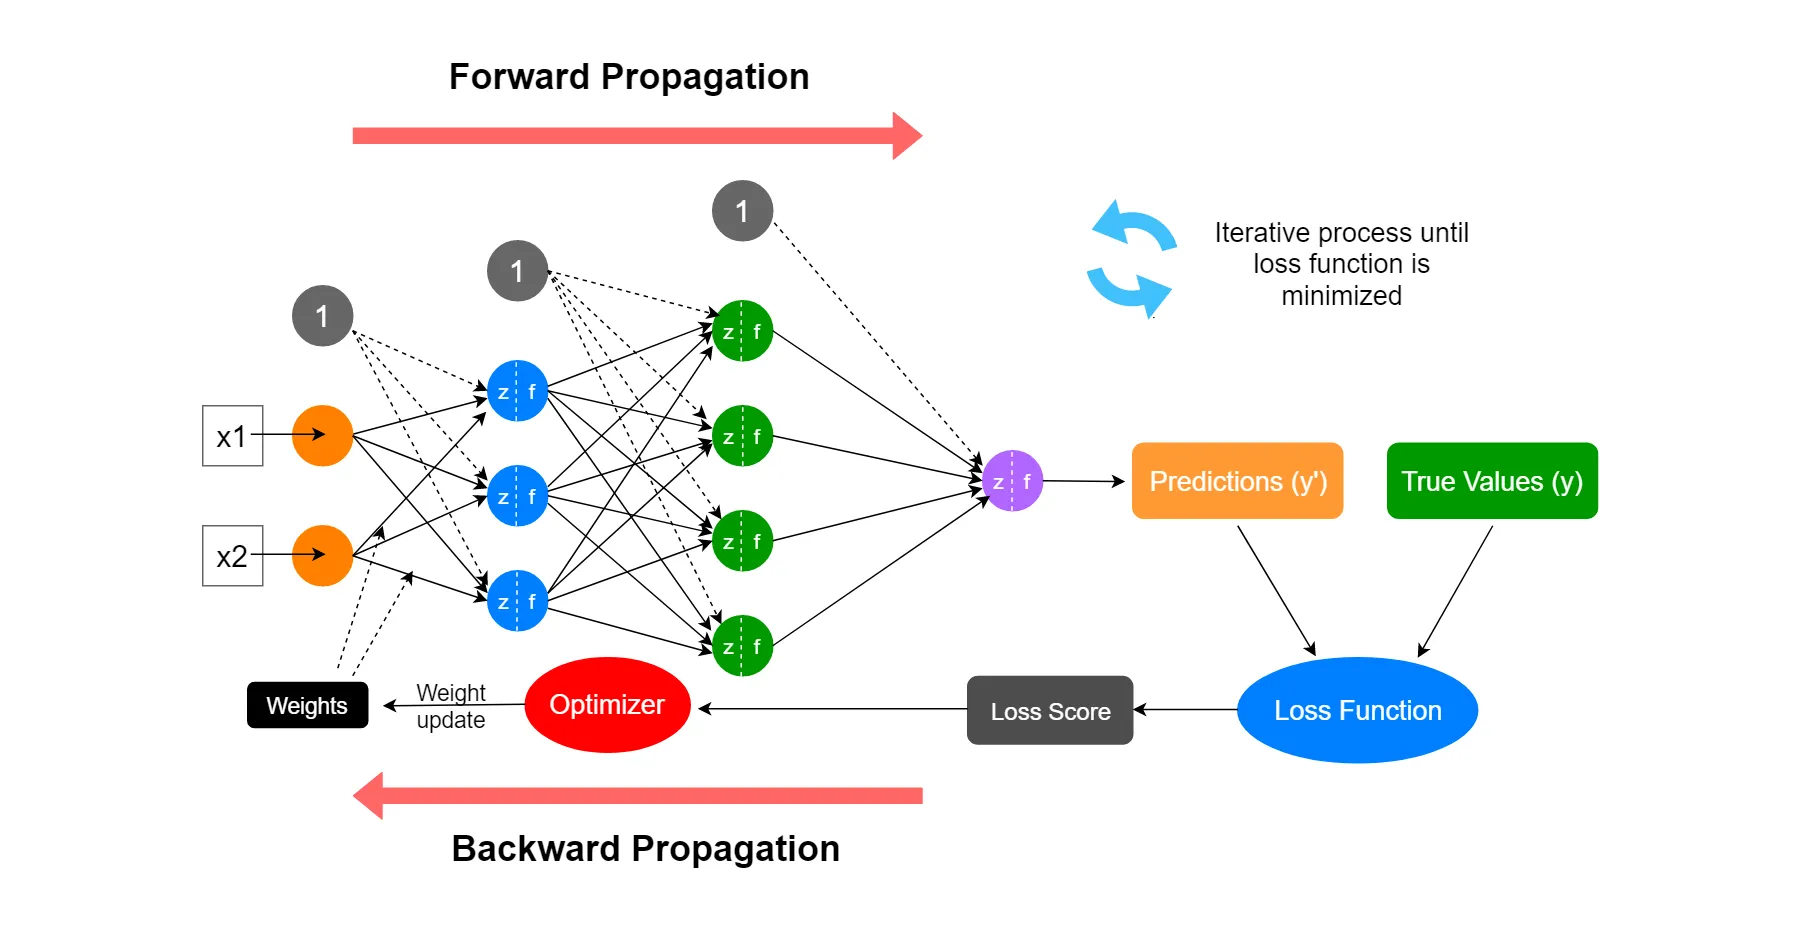

* In the above image(ANN), we are passing X1 and X2 as inputs to the neural network. 
* Here we can pass the inputs, irrespective of the order, which means we can pass X2 before X1.
* In ANN's order of inputs doesn't matter, but in RNN's sequence of inputs is very important.

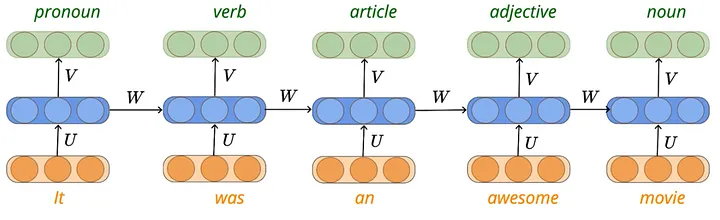

* For example, in the above image we can see that we are passing the sentence "It was an awesome movie" to a `RNN` which is giving the output.
* Here the meaning of the input sentence doesn't make sense with out the order like "was movie an awesome It". 
* So in order to capture meaning and essence of the input data the order in which we pass input data to `RNN` is very important.
* ANN doesn't able to capture the contextual meaning and essence of sequence data completely due to various reasons such as : 
    1. **Lack of memory** : Traditional feedforward ANNs lack memory, meaning they don't inherently understand the order or temporal dependencies within a sequence.
    2. **Fixed input size** : Many ANN architectures require fixed-size input vectors. However, sequences often vary in length, making it challenging to feed them directly into these networks. Techniques like padding or truncation can be used, but they may discard important information or introduce irrelevant data.
    3. **Limited context awareness** : ANNs might struggle with capturing context beyond a local window. 
    4. **Data sparsity and noise** : Sequence data often contain noise and may be sparse, making it difficult for ANNs to extract meaningful patterns.

In summary, 

- In a traditional neural network we assume that all inputs (and outputs) are independent of each other. 

- But for many tasks that is a very bad idea. If we want to predict the next word in a sentence we better know which words came before it. 

**To handle all the above issues, we need a seperate architecture which is an `RNN` architecture.**

# **1. Introduction to Recurrent Neural Network (RNN)** <a class="anchor" id="1"></a>


[Back to Table of Contents](#0.1)


- **Recurrent Neural Networks (RNNs)** are a family of networks that are suitable for learning representations of sequential data like text in Natural Language Processing (NLP).

- The idea behind RNNs is to make use of sequential information.

- RNNs are called recurrent because they perform the same task for every element of a sequence, with the output being depended on the previous computations. 

- Another way to think about RNNs is that they have a “memory” which captures information about what has been calculated so far. 

- In theory RNNs can make use of information in arbitrarily long sequences, but in practice they are limited to looking back only a few steps. 

- Here is what a typical RNN looks like:



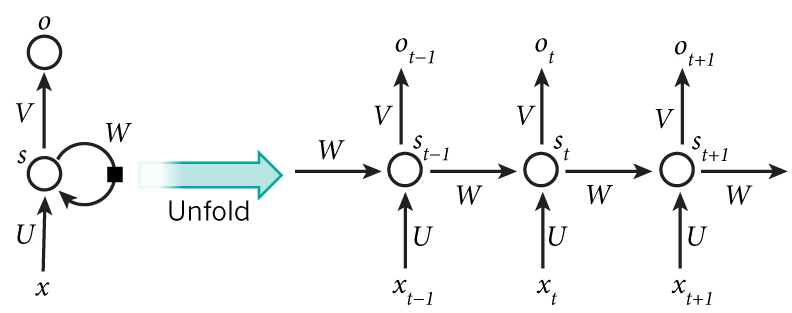

- The above diagram shows a RNN being unrolled (or unfolded) into a full network. 

- By unrolling we simply mean that we write out the network for the complete sequence. 

- For example, if the sequence we care about is a sentence of 5 words, the network would be unrolled into a 5-layer neural network, one layer for each word.

- Please follow the link below for in-depth discussion on RNN.

[Recurrent Neural Network from Wikipedia](https://en.wikipedia.org/wiki/Recurrent_neural_network)

[Introduction to RNNs from AnalyticsVidhya](https://www.analyticsvidhya.com/blog/2017/12/introduction-to-recurrent-neural-networks/)

# **2. RNN Computations** <a class="anchor" id="2"></a>

[Back to Table of Contents](#0.1)

- We can describe the computations within an RNN in terms of equations. 

- The internal state of the RNN at a time t is given by the value of the hidden vector ht, which is the sum of the product of the weight matrix W and the hidden state ht-1 at time t-1 and the product of the weight matrix U and the input xt at time t, passed through the tanh nonlinearity. 

- The choice of tanh over other nonlinearities has to do with its second derivative decaying very slowly to zero. 

- This keeps the gradients in the linear region of the activation function and helps combat the vanishing gradient problem. 

- The output vector yt at time t is the product of the weight matrix V and the hidden state ht, with softmax applied to the product so the resulting vector is a set of output probabilities:


      ht = tanh(Wht-1 + UXt)
    
      yt = softmax(Vht)
      

- Keras provides the SimpleRNN (for more information refer to: https://keras.io/layers/recurrent/) recurrent layer that incorporates all the logic we have seen so far, as well as the more advanced variants such as LSTM and GRU that we will see later in this kernel.

# **3. SimpleRNN cells** <a class="anchor" id="3"></a>


[Back to Table of Contents](#0.1)


- Traditional multilayer perceptron neural networks make the assumption that all inputs are independent of each other. This assumption breaks down in the case of sequence data. 

- Time series data, such as stock prices, also exhibit a dependence on past data, called the secular trend.

- RNN cells incorporate this dependence by having a hidden state, or memory, that holds the essence of the past. 

- The value of the hidden state at any point in time is a function of the value of the hidden state at the previous time step and the value of the input at the current time step, that is:


        ht = Ø(ht-1.Xt)
        

  - ht and ht-1 are the values of the hidden states at the time steps t and t-1 respectively, and xt is the value of the input at time t. 
  
  - The above equation is recursive, that is, ht-1 can be represented in terms of ht-2 and xt-1, and so on, until the beginning of the sequence. 
  
- This is how RNNs encode and incorporate information from arbitrarily long sequences.


# **4.Implementation of SimpleRNN with Keras - Text Generation** <a class="anchor" id="4"></a>

[Back to Table of Contents](#0.1)


- RNNs have been used extensively by the natural language processing (NLP) community for various applications. One such application is building language models. A language model allows us to predict the probability of a word in a text given the previous words. Language models are important for various higher level tasks such as machine translation, spelling correction, and so on.

- In this example, we will train a character based language model on the text of Alice in Wonderland to predict the next character given 10 previous characters. We have chosen to build a character-based model here because it has a smaller vocabulary and trains quicker. 

- The idea is the same as using a word-based language model, except we use characters instead of words. We will then use the trained model to generate some text in the same style.

- We will proceed as follows:

- Let's check the input folder and files

**Data Source :** https://www.kaggle.com/datasets/chandan2495/alice-in-wonderland-gutenbergproject

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

- Then we import the necessary modules as follows:

In [3]:
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Dense, Activation

- As the file contains line breaks and non-ASCII characters, so we should do some preliminary cleanup and write out the contents into a variable called text as follows:

In [4]:
INPUT_FILE = "./data/wonderland.txt"

In [5]:
# extract the input as a stream of characters
print("Extracting text from input...")
fin = open(INPUT_FILE, 'rb')
lines = []
for line in fin:
    line = line.strip().lower()
    line = line.decode("ascii", "ignore")
    if len(line) == 0:
        continue
    lines.append(line)
fin.close()
text = " ".join(lines)

Extracting text from input...


- Now, we are building a character-level RNN. In this case, the  vocabulary is the set of characters that occur in the text. 

- We will be dealing with the indexes to these characters rather than the characters themselves, the following code snippet creates the necessary lookup tables:

In [6]:
# creating lookup tables
# Here chars is the number of features in our character "vocabulary"
chars = set([c for c in text])
nb_chars = len(chars)
char2index = dict((c, i) for i, c in enumerate(chars))
index2char = dict((i, c) for i, c in enumerate(chars))

- In the next step, we create the input and label texts.

In [7]:
# create inputs and labels from the text. We do this by stepping
# through the text ${step} character at a time, and extracting a 
# sequence of size ${seqlen} and the next output char. For example,
# assuming an input text "The sky was falling", we would get the 
# following sequence of input_chars and label_chars (first 5 only)
#   The sky wa -> s
#   he sky was ->  
#   e sky was  -> f
#    sky was f -> a
#   sky was fa -> l
print("Creating input and label text...")
SEQLEN = 10
STEP = 1

Creating input and label text...


In [8]:
input_chars = []
label_chars = []
for i in range(0, len(text) - SEQLEN, STEP):
    input_chars.append(text[i:i + SEQLEN])
    label_chars.append(text[i + SEQLEN])

- The next step is to vectorize these input and label texts.

In [10]:
# vectorize the input and label chars
# Each row of the input is represented by seqlen characters, each 
# represented as a 1-hot encoding of size len(char). There are 
# len(input_chars) such rows, so shape(X) is (len(input_chars),
# seqlen, nb_chars).
# Each row of output is a single character, also represented as a
# dense encoding of size len(char). Hence shape(y) is (len(input_chars),
# nb_chars).
print("Vectorizing input and label text...")
X = np.zeros((len(input_chars), SEQLEN, nb_chars), dtype=bool)
y = np.zeros((len(input_chars), nb_chars), dtype=bool)
for i, input_char in enumerate(input_chars):
    for j, ch in enumerate(input_char):
        X[i, j, char2index[ch]] = 1
    y[i, char2index[label_chars[i]]] = 1

Vectorizing input and label text...


- Finally, we are ready to build our model.

- The RNN is connected to a dense (fully connected) layer. The dense layer has (nb_char) units, which emits scores for each of the characters in the vocabulary. 

- The activation on the dense layer is a softmax, which normalizes the scores to probabilities. The character with the highest probability is chosen as the prediction. 

- We compile the model with the categorical cross-entropy loss function, a good loss function for categorical outputs, and the RMSprop optimizer.

In [11]:
# Build the model. We use a single RNN with a fully connected layer
# to compute the most likely predicted output char
HIDDEN_SIZE = 128
BATCH_SIZE = 128
NUM_ITERATIONS = 25
NUM_EPOCHS_PER_ITERATION = 1
NUM_PREDS_PER_EPOCH = 100

model = Sequential()
model.add(SimpleRNN(HIDDEN_SIZE, return_sequences=False,
                    input_shape=(SEQLEN, nb_chars),
                    unroll=True))
model.add(Dense(nb_chars))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop")

- Our model consists of generating a character from the model given a random input, then dropping the first character from the input and appending the predicted character from our previous run, and generating another character from the model. 

- We continue this 100 times (NUM_PREDS_PER_EPOCH=100) and generate and print the resulting string. The string gives us an indication of the quality of the model.

In [12]:
# We train the model in batches and test output generated at each step
for iteration in range(NUM_ITERATIONS):
    print("=" * 50)
    print("Iteration #: %d" % (iteration))
    model.fit(X, y, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS_PER_ITERATION)
    
    # testing model
    # randomly choose a row from input_chars, then use it to 
    # generate text from model for next 100 chars
    test_idx = np.random.randint(len(input_chars))
    test_chars = input_chars[test_idx]
    print("Generating from seed: %s" % (test_chars))
    print(test_chars, end="")
    for i in range(NUM_PREDS_PER_EPOCH):
        Xtest = np.zeros((1, SEQLEN, nb_chars))
        for i, ch in enumerate(test_chars):
            Xtest[0, i, char2index[ch]] = 1
        pred = model.predict(Xtest, verbose=0)[0]
        ypred = index2char[np.argmax(pred)]
        print(ypred, end="")
        # move forward with test_chars + ypred
        test_chars = test_chars[1:] + ypred
    print()


Iteration #: 0
1241/1241 [==============================] - 7s 5ms/step - loss: 2.3468
Generating from seed:  mock turt
 mock turt and the hathe hathe hathe hathe hathe hathe hathe hathe hathe hathe hathe hathe hathe hathe hathe h
Iteration #: 1
1241/1241 [==============================] - 6s 5ms/step - loss: 2.0471
Generating from seed: not seem t
not seem the way her alice the wast the way she way she way she way she way she way she way she way she way sh
Iteration #: 2
1241/1241 [==============================] - 7s 6ms/step - loss: 1.9441
Generating from seed: prisoner t
prisoner the made the mare the project gutenberg-tm the project gutenberg-tm the project gutenberg-tm the proj
Iteration #: 3
1241/1241 [==============================] - 7s 6ms/step - loss: 1.8637
Generating from seed: lied rathe
lied rather alice to the roull the coull the coull the coull the coull the coull the coull the coull the coull
Iteration #: 4
1241/1241 [==============================] - 7s 5ms/step - lo

- The output of this run is shown above. 

- We can see that our model is character-based and has no knowledge of words, yet it learns to spell words that look like they might have come from the original text.

# **5. RNN topologies** <a class="anchor" id="5"></a>

[Back to Table of Contents](#0.1)


- The APIs for MLP and CNN architectures are limited. Both architectures accept a fixed-size tensor as input and produce a fixed-size tensor as output; and they perform the transformation from input to output in a fixed number of steps given by the number of layers in the model. 

- RNNs don't have this limitation—you can have sequences in the input, the output, or both. This means that RNNs can be arranged in many ways to solve specific problems.

- RNNs combine the input vector with the previous state vector to produce a new state vector. This can be thought of as similar to running a program with some inputs and some internal variables. 

- The RNNs are more exciting because they allow us to operate over sequences of vectors: Sequences in the input, the output, or in the most general case both. 

- This property of being able to work with sequences gives rise to a number of common topologies shown below:

![Sequences of Vectors in RNNs](https://miro.medium.com/max/815/1*XosBFfduA1cZB340SSL1hg.png)

- In the above diagram each rectangle is a vector and arrows represent functions (e.g. matrix multiply). 

- Input vectors are in red, output vectors are in blue and green vectors hold the RNN’s state. 

- From left to right:

  - 1. Vanilla mode of processing without RNN, from fixed-sized input to fixed-sized output (e.g. image classification).
  
  - 2. Sequence output (e.g. image captioning takes an image and outputs a sentence of words).
  
  - 3. Sequence input (e.g. sentiment analysis where a given sentence is classified as expressing positive or negative sentiment).
  
  - 4. Sequence input and sequence output (e.g. Machine Translation: an RNN reads a sentence in English and then outputs a sentence in French).
  
  - 5. Synced sequence input and output (e.g. video classification where we wish to label each frame of the video).

# **6. Vanishing and Exploding gradients** <a class="anchor" id="6"></a>

[Back to Table of Contents](#0.1)


- Just like traditional neural networks, training the RNN also involves backpropagation. 

- The difference in this case is that since the parameters are shared by all time steps, the gradient at each output depends not only on the current time step, but also on the previous ones. 
 
- This process is called **backpropagation through time (BPTT)**.

- Regular RNNs might have a difficulty in learning long range dependencies.

- This kind of dependencies between sequence data is called long-term dependencies because the distance between the relevant information and the point where it is needed to make a prediction is very wide. 

- As this distance becomes wider, RNNs have a hard time learning these dependencies because it encounters either a vanishing or exploding gradient problem.

- These problems arise during training of a deep network when the gradients are being propagated back in time all the way to the initial layer.

- The gradients coming from the deeper layers have to go through continuous matrix multiplications because of the the chain rule, and as they approach the earlier layers, if they have small values (<1), they shrink exponentially until they vanish and make it impossible for the model to learn. This is the **vanishing gradient problem**.

- While on the other hand if they have large values (>1) they get larger and eventually blow up and crash the model. This is the **exploding gradient problem.**



- While there are a few approaches to minimize the problem of vanishing gradients, such as proper initialization of the W matrix, using a ReLU instead of tanh layers, and pre-training the layers using unsupervised methods, the most popular solution is to use the LSTM or GRU architectures (discussed next).

- These architectures have been designed to deal with the vanishing gradient problem and learn long term dependencies more effectively.

# **7. Long Short Term Memory (LSTM)** <a class="anchor" id="7"></a>

[Back to Table of Contents](#0.1)


- **Long Short Term Memory** networks – usually just called **LSTMs** – are a special kind of RNN, capable of learning long-term dependencies. They work tremendously well on a large variety of problems, and are now widely used.

- LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behaviour.

- All recurrent neural networks have the form of a chain of repeating modules of neural network. In standard RNNs, this repeating module will have a very simple structure, such as a single tanh layer.

- The repeating module in a standard RNN contains a single layer as shown below:

![Repeating module in a standard RNN](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-SimpleRNN.png)

- LSTMs also have this chain like structure, but the repeating module has a different structure. 

- Instead of having a single neural network layer, there are four, interacting in a very special way as shown below:

![LSTM Architecture](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png)

I will not go into Mathematical details behind LSTM. I will do it in a future kernel.

# **8. Gated Recurrent Unit** <a class="anchor" id="8"></a>

[Back to Table of Contents](#0.1)


- The GRU is a variant of the LSTM and was introduced by K. Cho.

- It retains the LSTM's resistance to the vanishing gradient problem, but its internal structure is simpler, and therefore is faster to train, since fewer computations are needed to make updates to its hidden state. 

- A Gated Recurrent Unit (GRU), as its name suggests, is a variant of the RNN architecture, and uses gating mechanisms to control and manage the flow of information between cells in the neural network. 

- The overview of GRU is illustrated in the following diagram:

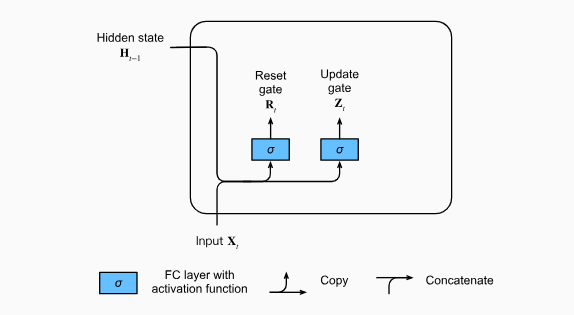

- The structure of the GRU allows it to adaptively capture dependencies from large sequences of data without discarding information from earlier parts of the sequence. 

- This is achieved through its gating units, similar to the ones in LSTMs, which solve the vanishing/exploding gradient problem of traditional RNNs. 

- These gates are responsible for regulating the information to be kept or discarded at each time step.

- Other than its internal gating mechanisms, the GRU functions just like an RNN, where sequential input data is consumed by the GRU cell at each time step along with the memory, or otherwise known as the hidden state. 

- The hidden state is then re-fed into the RNN cell together with the next input data in the sequence. This process continues like a relay system, producing the desired output.

- This process is illustrated in the following diagram.

GRU follows the same flow as typical RNN : <br><br>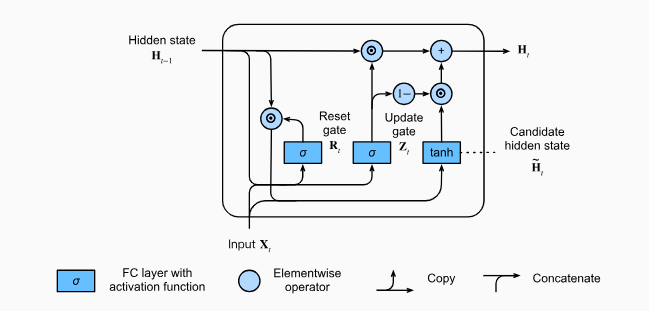

# **9. Summary and conclusion** <a class="anchor" id="9"></a>

[Back to Table of Contents](#0.1)


- In this notebook, I have discussed **Recurrent Neural Networks**.

- We have discussed SimpleRNN cell and its major limitation.

- We have discussed RNN topologies, variants of the SimpleRNN cell - **Long Short Term Memory (LSTM)** and **Gated Recurrent Unit (GRU)**.

- We have also seen basic RNN implementation in Keras in generating text.

# **10. References** <a class="anchor" id="10"></a>

[Back to Table of Contents](#0.1)


This kernel is based on the following books and websites:


-	Deep Learning with Python by Francois Chollet


-   Deep Learning with Keras by Antonio Gulli and Sujit Pal  


-	Advanced Deep Learning with Keras by Rowel Atienza


-   https://en.wikipedia.org/wiki/Recurrent_neural_network


-   https://www.analyticsvidhya.com/blog/2017/12/introduction-to-recurrent-neural-networks/


-   https://medium.com/explore-artificial-intelligence/an-introduction-to-recurrent-neural-networks-72c97bf0912


-   http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns/


-   https://colah.github.io/posts/2015-08-Understanding-LSTMs/


[Go to Top](#0)